# Importando dataset

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
chats_clients = pd.read_csv('/content/drive/Shareddrives/grupo3moshi/chats_clients.csv')
chats_clients.head()

,No,Intencao,Pergunta,Resposta
0,1,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,2,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
2,3,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
3,4,"Pedido de envio via metodo ""ByPhone""",Boa tarde\nAcabei de fazer a transferência de ...,iremos processar a sua solicitacao.\nMuito obr...
4,5,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao.\nMuito obr...


In [4]:
# Capturando 3 perguntas para cada intencao a fim de mocar testes da função do classificador naive bayes
chats_clients['Intencao'].unique()

array(['Como depositar', 'Como fazer remessa', 'Tempo de remessa',
       'Pedido de envio via metodo "ByPhone"', 'Como se inscrever',
       'Confirmacao de cambio/taxas', 'Envio via Deposit Code',
       'Registro/Atualizacao de Documento',
       'Solicitacao de cartao de remessas', 'Cadastro de beneficiario',
       'Acesso a conta', 'Termos e condicoes do servico',
       'Problemas de remessa', 'Tempo de entrega do cartao', 'Reembolso',
       'Regras do servico', 'Atualizacao de dados cadastrais',
       'Cancelamento'], dtype=object)

In [5]:
intentions = [
  'Como depositar', 'Como fazer remessa', 'Tempo de remessa',
  'Pedido de envio via metodo "ByPhone"', 'Como se inscrever',
  'Confirmacao de cambio/taxas', 'Envio via Deposit Code',
  'Registro/Atualizacao de Documento',
  'Solicitacao de cartao de remessas', 'Cadastro de beneficiario',
  'Acesso a conta', 'Termos e condicoes do servico',
  'Problemas de remessa', 'Tempo de entrega do cartao', 'Reembolso',
  'Regras do servico', 'Atualizacao de dados cadastrais',
  'Cancelamento'
]

sentences = []

# Coletando 3 frases para cada intenção
for intention in intentions:
  sentence = chats_clients[chats_clients['Intencao'] == intention].head(3)  # Pega as primeiras 3 frases para cada intenção
  sentences.append(sentence)

mock_dataframe = pd.concat(sentences, ignore_index=True)

In [6]:
mock_dataframe

,No,Intencao,Pergunta,Resposta
0,1,Como depositar,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o sr pode utilizar o cartão de d..."
1,42,Como depositar,Como faço para fazer transferência do banco do...,Acesse o seu app da Brastel Remit\n\n->三 Menu ...
2,50,Como depositar,Como faço para fazer depósito\nJá fiz o cadast...,"Bom dia !\nPara fazer o depósito, você pode so..."
3,2,Como fazer remessa,Como enviar dinheiro do Japão?,"Para se inscrever no serviço de remessa, por f..."
4,39,Como fazer remessa,Como enviar dinheiro do Japão?,"Para fazer o depósito, você pode solicitar um ..."
5,49,Como fazer remessa,"Quero enviar dinheiro para o Brasil, vc poderi...",Bom dia!\n\nPara se inscrever no serviço de re...
6,3,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
7,36,Tempo de remessa,Boa noite fiz um depósito agora quanto tempo e...,O processamento do depósito leva em torno de 2...
8,37,Tempo de remessa,Olá boa noite\nFiz uma remessa para o Brasil m...,"Boa noite\nVamos verificar, um momento por gen..."
9,4,"Pedido de envio via metodo ""ByPhone""",Boa tarde\nAcabei de fazer a transferência de ...,iremos processar a sua solicitacao.\nMuito obr...


# Implementação da Função do Classificador Naive Bayes e seus respectivos testes

Abaixo estamos trabalhando o item 2 do artefato: **Implementação de Modelo Baseline (BoW com NB)**

O item 2 aborda detalhamente:

2 - Definição da função de treinamento do classificador Naive Bayes (NB) e seus respectivos testes;

Alguns valores estarão sendo mocados a fim de testar a função e otimizar o trabalho antes do treinamento completo que pode ser encontrado no dataset final do artefato (notebook este que unifica todos os itens).



## Bag Of Words

### Descrição do Bag of Words (BoW):

O **Bag of Words (BoW)** é uma técnica de representação de texto que transforma frases em vetores de números inteiros, onde cada posição do vetor corresponde a uma palavra do vocabulário e o valor nessa posição indica a frequência (ou presença) dessa palavra na frase. É uma abordagem simples e eficaz para converter texto em uma forma que pode ser processada por algoritmos de machine learning.

### Nota sobre a Mockagem das Sentenças:

**Nota:** Estamos utilizando sentenças mockadas (simuladas) para otimizar o trabalho e focar na implementação do classificador Naive Bayes, garantindo que a estrutura e o funcionamento do modelo possam ser desenvolvidos e testados sem a necessidade de todos os dados nesta fase.

--

OPENCLASSROOMS. *Introduction to Natural Language Processing*. Disponível em: <https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/8081284-apply-a-simple-bag-of-words-approach>. Acesso em: 21 ago. 2024.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_bow(sentences):
	vectorizer = CountVectorizer()
	bow_matrix = vectorizer.fit_transform(sentences)
	return bow_matrix, vectorizer

In [8]:
# Gerando BoW para as setenças escolhidas anteriormente
bow_matrix, vectorizer = generate_bow(mock_dataframe['Pergunta'])

In [9]:
# Exibindo a matriz BoW
print("Matriz BoW:\n", bow_matrix.toarray())
print("\nVocabulário:\n", vectorizer.get_feature_names_out())

Matriz BoW:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Vocabulário:
 ['00' '000' '02' '100' '13' '150' '22' '22yenes' '23' '23yenes' '24' '31'
 '45yenes' '50' '500' '700' '7000' '800' '8000' '96' 'aaaa' 'acabei'
 'acessar' 'acima' 'add' 'adicionar' 'adquirir' 'agora' 'ainda' 'ajudar'
 'alguma' 'alguém' 'alterar' 'amarelo' 'app' 'aquele' 'as' 'através'
 'atualização' 'atualizei' 'até' 'banco' 'bbb' 'bem' 'beneficiario'
 'beneficiário' 'boa' 'bom' 'brasil' 'brastel' 'cada' 'cadastro' 'cair'
 'caiu' 'caixa' 'campo' 'cancelada' 'cancelem' 'card' 'cartão' 'chegar'
 'chegou' 'coisa' 'colocar' 'coloquei' 'com' 'como' 'confirmação'
 'conseguindo' 'conseguir' 'conseguiram' 'consigo' 'conta' 'correio'
 'corrente' 'correção' 'cotação' 'código' 'da' 'de' 'demora' 'demorando'
 'depositar' 'depósito' 'descontado' 'dia' 'diferença' 'dinheiro' 'direto'
 'do' 'documento' 'dois' 'duas' 'dá' 'dólar' 'dúvida' 'econômica'
 'efet

## Classificador Naive Bayes

O algoritmo baseado no Teorema de Bayes, classifica com a suposição "ingênua" (naive) de que todas as características (ou atributos) do conjunto de dados são independentes umas das outras.

**Teorema de Bayes**
O Teorema de Bayes fornece uma maneira de calcular a probabilidade de uma classe com base nas características observadas.

$$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$


Onde:
- \(P(C|X)\) é a probabilidade posterior da classe \(C\) dado o conjunto de características \(X\).
- \(P(X|C)\) é a probabilidade de observar o conjunto de características \(X\) dado que a classe é \(C\).
- \(P(C)\) é a probabilidade a priori da classe \(C\).
- \(P(X)\) é a probabilidade a priori do conjunto de características \(X\).

Existem diferentes variações do Naive Bayes, dependendo do tipo de dado. Para nosso caso o que melhor se encaixa é o Multinominal Naive Bayes.

**Multinomial Naive Bayes**: Usado principalmente para classificação de documentos, onde as características são as frequências de palavras.


_Referência_:

SCIKIT-LEARN. sklearn.naive_bayes.MultinomialNB. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#gallery-examples. Acesso em: 22 ago. 2024.

IBM. Naïve Bayes. Disponível em: https://www.ibm.com/topics/naive-bayes#:~:text=Na%C3%AFve%20Bayes%20is%20part%20of,important%20to%20differentiate%20between%20classes. Acesso em: 22 ago. 2024.

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

class NaiveBayesClassifier:
  def __init__(self):
    self.classifier = MultinomialNB()

  def train(self, X_train, y_train):
    # Treina o classificador Naive Bayes com os dados fornecidos
    self.classifier.fit(X_train, y_train)

  def predict(self, X_test):
    # Faz previsões usando o modelo treinado
    return self.classifier.predict(X_test)

  def evaluate(self, y_test, y_pred):
    # Avalia o modelo usando a matriz de confusão e outras métricas
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    return cm, cr


**Testando a função do classificador naive bayes**

As instruções abaixo testam a função *NaiveBayesClassifier* em um exemplo prático de implementação.

In [11]:
# Dividindo os dados em conjuntos de treino e teste
labels = mock_dataframe['Intencao'].tolist()
X_train, X_test, y_train, y_test = train_test_split(bow_matrix, labels, test_size=0.2, random_state=42)


In [12]:
X_train, y_train

(<41x273 sparse matrix of type '<class 'numpy.int64'>'
 	with 613 stored elements in Compressed Sparse Row format>,
 ['Tempo de remessa',
  'Solicitacao de cartao de remessas',
  'Tempo de remessa',
  'Termos e condicoes do servico',
  'Como fazer remessa',
  'Problemas de remessa',
  'Solicitacao de cartao de remessas',
  'Reembolso',
  'Termos e condicoes do servico',
  'Cancelamento',
  'Confirmacao de cambio/taxas',
  'Pedido de envio via metodo "ByPhone"',
  'Confirmacao de cambio/taxas',
  'Acesso a conta',
  'Problemas de remessa',
  'Solicitacao de cartao de remessas',
  'Pedido de envio via metodo "ByPhone"',
  'Como depositar',
  'Atualizacao de dados cadastrais',
  'Cadastro de beneficiario',
  'Acesso a conta',
  'Tempo de entrega do cartao',
  'Cadastro de beneficiario',
  'Regras do servico',
  'Como depositar',
  'Registro/Atualizacao de Documento',
  'Como depositar',
  'Tempo de entrega do cartao',
  'Termos e condicoes do servico',
  'Registro/Atualizacao de Documento

In [14]:
print(f'Das 18 intenções o conjunto de treino tem: {len(set(y_train))}')

Das 18 intenções o conjunto de treino tem: 18


In [15]:
# Instanciando a classe NaiveBayesClassifier
nb_classifier = NaiveBayesClassifier()

# Treinando o classificador
nb_classifier.train(X_train, y_train)

# Fazendo previsões
y_pred = nb_classifier.predict(X_test)

# Avaliando o classificador
cm, cr = nb_classifier.evaluate(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Visualizando a matriz de confusão e o classification report**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

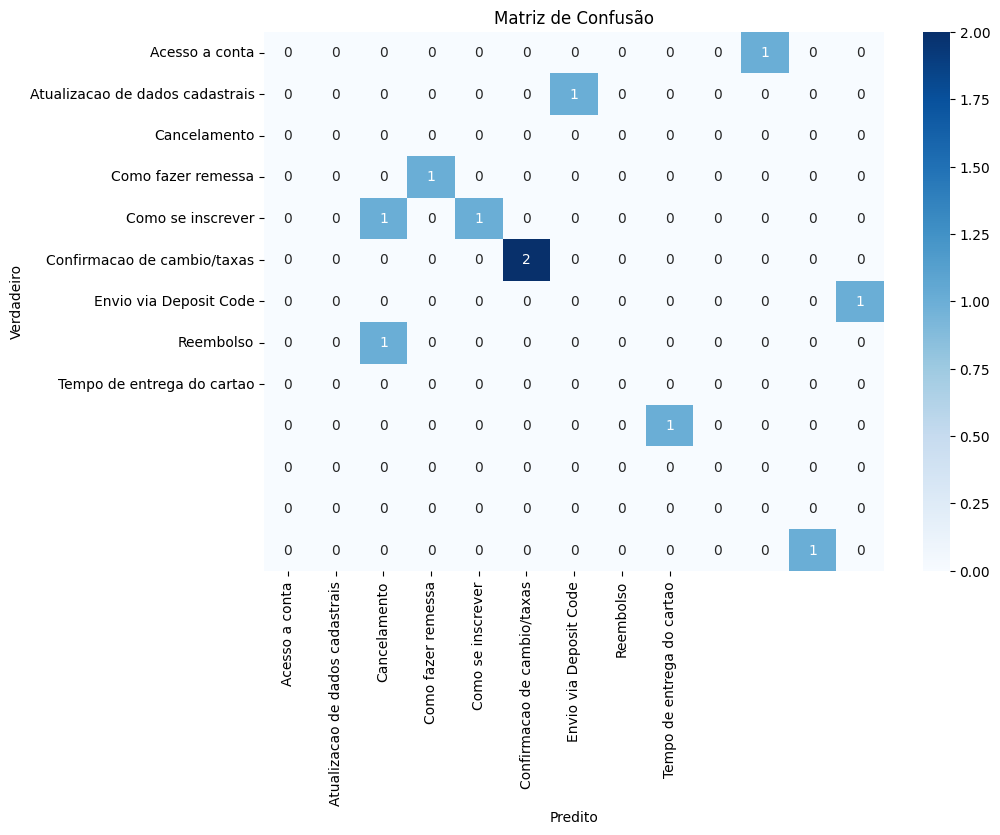

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [18]:
print(cr)

                                   precision    recall  f1-score   support

                   Acesso a conta       0.00      0.00      0.00         1
  Atualizacao de dados cadastrais       0.00      0.00      0.00         1
         Cadastro de beneficiario       0.00      0.00      0.00         0
                     Cancelamento       1.00      1.00      1.00         1
               Como fazer remessa       1.00      0.50      0.67         2
                Como se inscrever       1.00      1.00      1.00         2
      Confirmacao de cambio/taxas       0.00      0.00      0.00         1
           Envio via Deposit Code       0.00      0.00      0.00         1
             Problemas de remessa       0.00      0.00      0.00         0
                        Reembolso       0.00      0.00      0.00         1
Registro/Atualizacao de Documento       0.00      0.00      0.00         0
Solicitacao de cartao de remessas       0.00      0.00      0.00         0
       Tempo de entrega 